In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [2]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.5.0


In [3]:
experiment_id = "o2WAobe4TAaZRSyrslcYFA"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()

In [48]:
df['step'] = df['step']+1

In [58]:
df

,run,tag,step,value
0,100k,test/time_reversal_acc,1,0.933176
1,100k,test/time_reversal_acc,2,0.946439
2,100k,test/time_reversal_acc,3,0.949055
3,100k,test/time_reversal_acc,4,0.946179
4,100k,test/time_reversal_acc,5,0.954106
...,...,...,...,...
1791,1k,train/time_reversal_loss,195,0.098047
1792,1k,train/time_reversal_loss,196,0.097452
1793,1k,train/time_reversal_loss,197,0.097978
1794,1k,train/time_reversal_loss,198,0.096575


In [59]:
print(df["run"].unique())
print(df["tag"].unique())

['100k' '10k' '1k']
['test/time_reversal_acc' 'test/time_reversal_loss'
 'train/time_reversal_acc' 'train/time_reversal_loss']


In [60]:
dfw = experiment.get_scalars(pivot=False) 
dfw

,run,tag,step,value
0,100k,test/time_reversal_acc,0,0.933176
1,100k,test/time_reversal_acc,1,0.946439
2,100k,test/time_reversal_acc,2,0.949055
3,100k,test/time_reversal_acc,3,0.946179
4,100k,test/time_reversal_acc,4,0.954106
...,...,...,...,...
1791,1k,train/time_reversal_loss,194,0.098047
1792,1k,train/time_reversal_loss,195,0.097452
1793,1k,train/time_reversal_loss,196,0.097978
1794,1k,train/time_reversal_loss,197,0.096575


In [61]:
dfw['step'] = dfw['step'] +1

In [62]:
dfw_validation = dfw[dfw.tag.str.startswith("test")]


In [63]:
dfw_validation_acc = dfw_validation[dfw_validation.tag.str.endswith('acc')]
dfw_validation_loss = dfw_validation[dfw_validation.tag.str.endswith('loss')]

In [64]:
dfw_validation_acc['#subject'] = dfw_validation_acc['run'] 
dfw_validation_acc

/Users/hangy/opt/miniconda3/envs/dreams_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,run,tag,step,value,#subject
0,100k,test/time_reversal_acc,1,0.933176,100k
1,100k,test/time_reversal_acc,2,0.946439,100k
2,100k,test/time_reversal_acc,3,0.949055,100k
3,100k,test/time_reversal_acc,4,0.946179,100k
4,100k,test/time_reversal_acc,5,0.954106,100k
...,...,...,...,...,...
1194,1k,test/time_reversal_acc,195,0.937920,1k
1195,1k,test/time_reversal_acc,196,0.938235,1k
1196,1k,test/time_reversal_acc,197,0.936105,1k
1197,1k,test/time_reversal_acc,198,0.937890,1k


In [65]:
dfw_validation_loss['#subject'] = dfw_validation_loss['run'] 
dfw_validation_acc

/Users/hangy/opt/miniconda3/envs/dreams_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,run,tag,step,value,#subject
0,100k,test/time_reversal_acc,1,0.933176,100k
1,100k,test/time_reversal_acc,2,0.946439,100k
2,100k,test/time_reversal_acc,3,0.949055,100k
3,100k,test/time_reversal_acc,4,0.946179,100k
4,100k,test/time_reversal_acc,5,0.954106,100k
...,...,...,...,...,...
1194,1k,test/time_reversal_acc,195,0.937920,1k
1195,1k,test/time_reversal_acc,196,0.938235,1k
1196,1k,test/time_reversal_acc,197,0.936105,1k
1197,1k,test/time_reversal_acc,198,0.937890,1k


In [82]:
import matplotlib.pyplot as plt
sns.set_palette('colorblind')
plt.rcParams["figure.figsize"] = (9,4)
plt.rcParams.update({'font.size': 11})



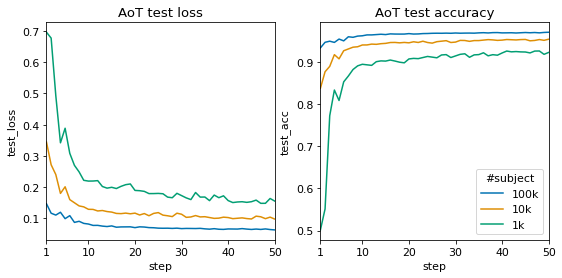

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2)

left= 1
right=50

sns.lineplot(data=dfw_validation_loss, x="step", y="value", ax=axes[0],
             hue='#subject').set_title("AoT test loss")
axes[0].set_xlim(left, right)
axes[0].set_ylabel('test_loss')
axes[0].get_legend().remove()
axes[0].set_xticks([1, 10, 20, 30, 40, 50])


sns.lineplot(data=dfw_validation_acc, x="step", y="value", ax=axes[1],
             hue='#subject').set_title("AoT test accuracy")
axes[1].set_xlim(left, right)
axes[1].set_ylabel('test_acc')
axes[1].set_xticks([1, 10, 20, 30, 40, 50])


fig.savefig('training.pdf', bbox_inches='tight', dpi=600)